In [668]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [617]:
voltaje=[-0.5,-0.464,-0.407,-0.397,-0.393,-0.386,-0.380,-0.376,-0.37,-0.367,-0.3]
intensidad=[1,2,5,5.5,6,7,6.5,7.5,9,8,8.5]
e=-1.602e-19

In [618]:
coefficients, cov = np.polyfit(intensidad, voltaje, 1, cov=True)
poly = np.poly1d(coefficients)
x_trend = np.linspace(min(intensidad), max(intensidad), 100)
y_trend = poly(x_trend)
v_m=coefficients[1]
y_pred = poly(intensidad)
r2 = r2_score(voltaje, y_pred)

In [619]:
datos_az=np.genfromtxt("Datos_Azul.csv", delimiter=',', skip_header=2)
datos_az[:,0]**=np.e

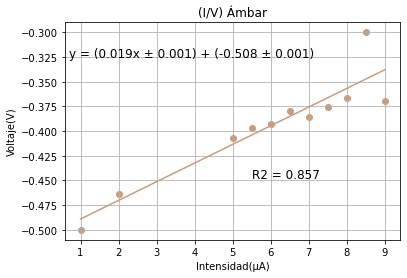

In [620]:
plt.xlabel('Intensidad(µA)')
plt.ylabel('Voltaje(V)')
plt.scatter(intensidad, voltaje, color="#c89c7d")
plt.plot(x_trend,y_trend, color="#c89c7d")
plt.text(0.7,-0.325,f'y = ({coefficients[0]:.3f}x ± 0.001) + ({coefficients[1]:.3f} ± 0.001)', fontsize=12)
plt.text(5.5,-0.448, f'R2 = {r2:.3f}', fontsize=12)
plt.title("(I/V) Ámbar")
plt.grid()
plt.savefig("fig.png")

In [621]:
voltaje_v=[-0.585,-0.582,-0.583,-0.584,-0.575,-0.578,-0.575,-0.57,-0.572]
intensidad_v=[1,1.5,2,2.5,4,4.50,5.5,6.5,7]

In [622]:
coefficients_,cov = np.polyfit(intensidad_v, voltaje_v, 1,cov=True)
poly = np.poly1d(coefficients_)
x_trend_v = np.linspace(min(intensidad_v), max(intensidad_v), 100)
y_trend_v = poly(x_trend_v)
v_v=coefficients_[1]
y_pred = poly(intensidad_v)
r2 = r2_score(voltaje_v, y_pred)

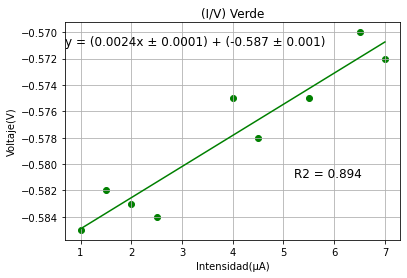

In [624]:
plt.xlabel('Intensidad(µA)')
plt.ylabel('Voltaje(V)')
plt.scatter(intensidad_v, voltaje_v, color="green")
plt.plot(x_trend_v,y_trend_v, color="green")
plt.text(0.7,-0.571,f'y = ({coefficients_[0]:.4f}x ± 0.0001) + ({coefficients_[1]:.3f} ± 0.001)', fontsize=12)
plt.grid()
plt.title("(I/V) Verde")
plt.text(5.2,-0.581, f'R2 = {r2:.3f}', fontsize=12)
plt.savefig("fig.png")

In [625]:
datos_az=np.genfromtxt("Datos_Azul.csv", delimiter=',', skip_header=2)
intensidad=datos_az[:,0]
voltaje=datos_az[:,1]

In [626]:
coefficients = np.polyfit(intensidad, voltaje, 1)
poly = np.poly1d(coefficients)
x_trend = np.linspace(min(intensidad), max(intensidad), 100)
y_trend = poly(x_trend)
v_a=coefficients[1]
y_pred = poly(intensidad)
r2 = r2_score(voltaje, y_pred)

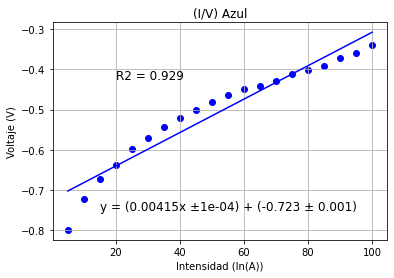

In [628]:
plt.xlabel('Intensidad (ln(A))')
plt.ylabel('Voltaje (V)')
plt.scatter(intensidad, voltaje, color="blue")
plt.plot(x_trend,y_trend, color="blue")
plt.text(15,-0.75,f'y = ({coefficients[0]:.5f}x ±1e-04) + ({coefficients[1]:.3f} ± 0.001)', fontsize=12)
plt.grid()
plt.text(20,-0.425, f'R2 = {r2:.3f}', fontsize=12)
plt.title("(I/V) Azul")
plt.savefig("fig.png")

In [629]:
datos_ro=np.genfromtxt("Datos_Rojo.csv", delimiter=',', skip_header=2)
intensidad=datos_ro[:,0]
voltaje=datos_ro[:,1]

In [630]:
coefficients = np.polyfit(intensidad, voltaje, 1)
poly = np.poly1d(coefficients)
x_trend = np.linspace(min(intensidad), max(intensidad), 100)
y_trend = poly(x_trend)
v_r=coefficients[1]
y_pred = poly(intensidad)
r2 = r2_score(voltaje, y_pred)

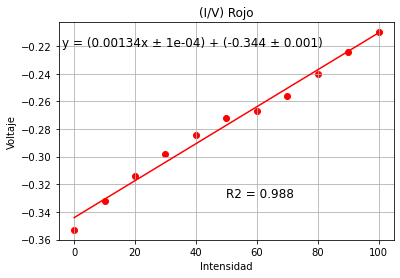

In [631]:
plt.xlabel('Intensidad')
plt.ylabel('Voltaje')
plt.scatter(intensidad, voltaje, color="red")
plt.plot(x_trend,y_trend, color="red")
plt.text(-4,-0.22,f'y = ({coefficients[0]:.5f}x ± 1e-04) + ({coefficients[1]:.3f} ± 0.001)', fontsize=12)
plt.grid()
plt.text(50,-0.329, f'R2 = {r2:.3f}', fontsize=12)
plt.title("(I/V) Rojo")
plt.savefig("fig.png")

In [632]:
f_m=5.9e-10
f_v=5.67e-10
f_a=4.69e-10
f_r=6.59e-10
c=299792
f=np.array([f_m,f_v,f_a,f_r])
f=c/f
f

array([5.08122034e+14, 5.28733686e+14, 6.39215352e+14, 4.54919575e+14])

In [646]:
voltajes=np.array([v_m,v_v,v_a,v_r])
voltajes*=(-1)

In [667]:
coefficients,cov = np.polyfit(f, voltajes, 1,cov=True)
poly = np.poly1d(coefficients)
x_trend = np.linspace(min(f), max(f), 100)
y_trend = poly(x_trend)
cov[1,1]/coefficients[1]
y_pred = poly(f)
r2 = r2_score(voltajes, y_pred)

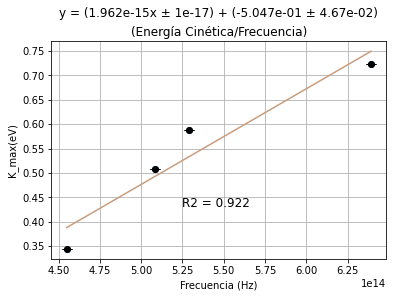

In [665]:
plt.scatter(f,voltajes)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('K_max(eV)')
plt.plot(x_trend,y_trend, color="#c89c7d")
plt.grid()
plt.text(4.50e14,0.82,f'y = ({coefficients[0]:.3e}x ± 1e-17) + ({coefficients[1]:.3e} ± {cov[1,1]:.2e})', fontsize=12)
plt.errorbar(f, voltajes, yerr=error, fmt='o', capsize=5, color='black')
plt.text(5.25e14,0.43, f'R2 = {r2:.3f}', fontsize=12)
plt.title("(Energía Cinética/Frecuencia)")
plt.savefig("fig.png")

In [666]:
y_hat = coefficients[0] * f + coefficients[1]
residuals = voltajes - y_hat
np.std(residuals)

0.03818858469617461

In [637]:
1.602e-19*0.001

1.602e-22